### HR Analytics Project- Understanding the Attrition in HR
Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [392]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
display(df.head())

Age Attrition     BusinessTravel  DailyRate              Department  \
0  41   Yes       Travel_Rarely      1102       Sales                    
1  49   No        Travel_Frequently  279        Research & Development   
2  37   Yes       Travel_Rarely      1373       Research & Development   
3  33   No        Travel_Frequently  1392       Research & Development   
4  27   No        Travel_Rarely      591        Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0  1                 2          Life Sciences  1              1                
1  8                 1          Life Sciences  1              2                
2  2                 2          Other          1              4                
3  3                 4          Life Sciences  1              5                
4  2                 1          Medical        1              7                

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0  2                        Female  94          3               2          
1  3                        Male    61          2               2          
2  4                        Male    92          2               1          
3  4                        Female  56          3               1          
4  1                        Male    40          3               1          

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0  Sales Executive        4                Single        5993            
1  Research Scientist     2                Married       5130            
2  Laboratory Technician  3                Single        2090            
3  Research Scientist     3                Married       2909            
4  Laboratory Technician  2                Married       3468            

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0  19479        8                   Y      Yes      11                  
1  24907        1                   Y      No       23                  
2  2396         6                   Y      Yes      15                  
3  23159        1                   Y      Yes      11                  
4  16632        9                   Y      No       12                  

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0  3                  1                         80              
1  4                  4                         80              
2  3                  2                         80              
3  3                  3                         80              
4  3                  4                         80              

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0  0                 8                  0                       
1  1                 10                 3                       
2  0                 7                  3                       
3  0                 8                  3                       
4  1                 6                  3                       

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0  1                6               4                    
1  3                10              7                    
2  3                0               0                    
3  3                8               7                    
4  3                2               2                    

   YearsSinceLastPromotion  YearsWithCurrManager  
0  0                        5                     
1  1                        7                     
2  0                        0                     
3  3                        0                     
4  2                        2

In [229]:
df.shape

(1470, 35)

In [230]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [231]:
df.dtypes

Age                         int64 
Attrition                   object
BusinessTravel              object
DailyRate                   int64 
Department                  object
DistanceFromHome            int64 
Education                   int64 
EducationField              object
EmployeeCount               int64 
EmployeeNumber              int64 
EnvironmentSatisfaction     int64 
Gender                      object
HourlyRate                  int64 
JobInvolvement              int64 
JobLevel                    int64 
JobRole                     object
JobSatisfaction             int64 
MaritalStatus               object
MonthlyIncome               int64 
MonthlyRate                 int64 
NumCompaniesWorked          int64 
Over18                      object
OverTime                    object
PercentSalaryHike           int64 
PerformanceRating           int64 
RelationshipSatisfaction    int64 
StandardHours               int64 
StockOptionLevel            int64 
TotalWorkingYears   

Text(0.5, 1.0, 'MonthlyRate vs EducationField')

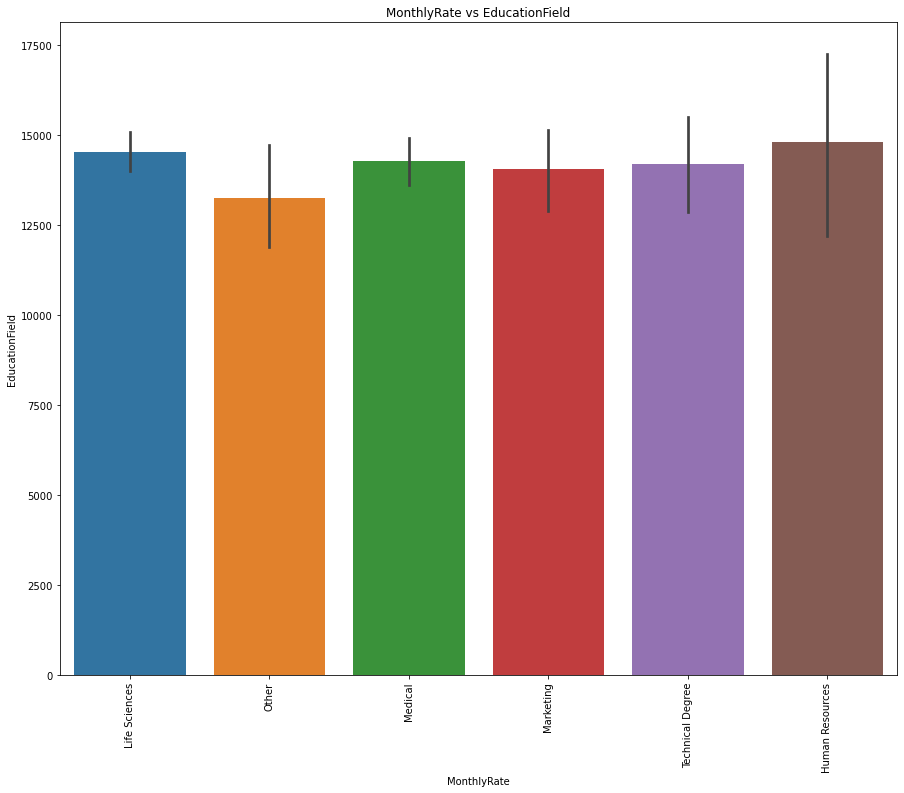

In [372]:
plt.figure(figsize=(15,12))
sns.barplot(x='EducationField',y='MonthlyRate',data=df)
plt.xticks(rotation=90)
plt.xlabel('MonthlyRate')
plt.ylabel('EducationField')
plt.title('MonthlyRate vs EducationField')

Text(0.5, 1.0, 'Attrition vs YearsSinceLastPromotion')

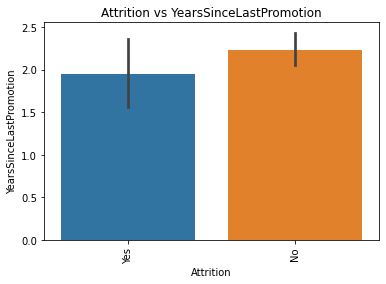

In [376]:
plt.figure(figsize=(6,4))
sns.barplot(x='Attrition',y='YearsSinceLastPromotion',data=df)
plt.xticks(rotation=90)
plt.xlabel('Attrition')
plt.ylabel('YearsSinceLastPromotion')
plt.title('Attrition vs YearsSinceLastPromotion')

Text(0.5, 1.0, 'Attrition vs PercentSalaryHike')

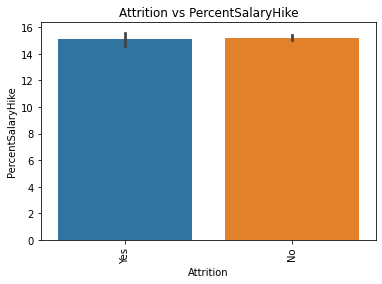

In [381]:
plt.figure(figsize=(6,4))
sns.barplot(x='Attrition',y='PercentSalaryHike',data=df)
plt.xticks(rotation=90)
plt.xlabel('Attrition')
plt.ylabel('PercentSalaryHike')
plt.title('Attrition vs PercentSalaryHike')

Text(0.5, 1.0, 'Attrition vs WorkLifeBalance')

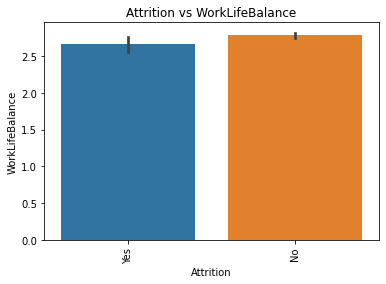

In [382]:
plt.figure(figsize=(6,4))
sns.barplot(x='Attrition',y='WorkLifeBalance',data=df)
plt.xticks(rotation=90)
plt.xlabel('Attrition')
plt.ylabel('WorkLifeBalance')
plt.title('Attrition vs WorkLifeBalance')

Text(0.5, 1.0, 'Attrition vs YearsInCurrentRole')

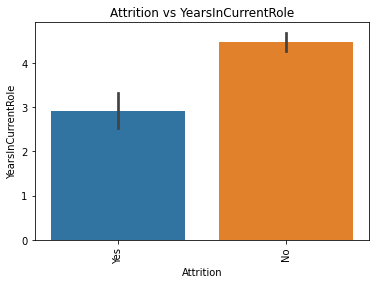

In [383]:
plt.figure(figsize=(6,4))
sns.barplot(x='Attrition',y='YearsInCurrentRole',data=df)
plt.xticks(rotation=90)
plt.xlabel('Attrition')
plt.ylabel('YearsInCurrentRole')
plt.title('Attrition vs YearsInCurrentRole')

Text(0.5, 1.0, 'Attrition vs YearsAtCompany')

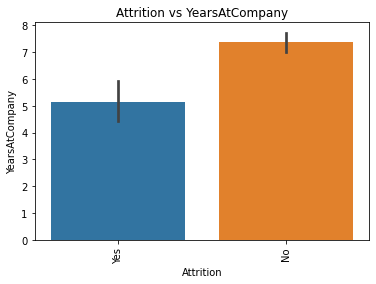

In [378]:
plt.figure(figsize=(6,4))
sns.barplot(x='Attrition',y='YearsAtCompany',data=df)
plt.xticks(rotation=90)
plt.xlabel('Attrition')
plt.ylabel('YearsAtCompany')
plt.title('Attrition vs YearsAtCompany')

Text(0.5, 1.0, 'Attrition vs TotalWorkingYears')

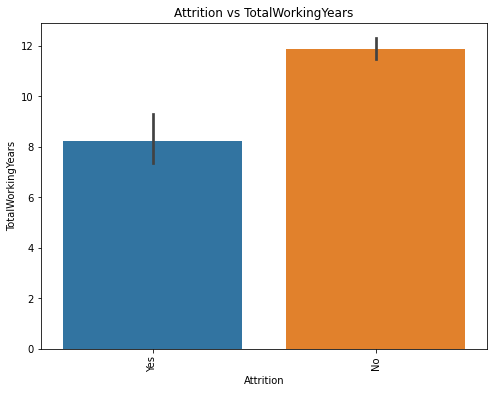

In [380]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='TotalWorkingYears',data=df)
plt.xticks(rotation=90)
plt.xlabel('Attrition')
plt.ylabel('TotalWorkingYears')
plt.title('Attrition vs TotalWorkingYears')

Text(0.5, 1.0, 'Attrition vs PercentSalaryHike')

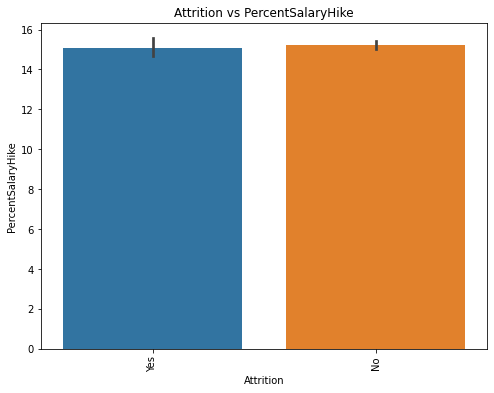

In [384]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='PercentSalaryHike',data=df)
plt.xticks(rotation=90)
plt.xlabel('Attrition')
plt.ylabel('PercentSalaryHike')
plt.title('Attrition vs PercentSalaryHike')

Text(0.5, 1.0, 'Attrition vs NumCompaniesWorked')

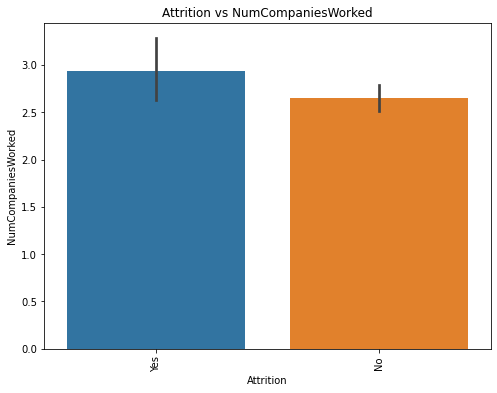

In [385]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='NumCompaniesWorked',data=df)
plt.xticks(rotation=90)
plt.xlabel('Attrition')
plt.ylabel('NumCompaniesWorked')
plt.title('Attrition vs NumCompaniesWorked')

In [27]:
Categorical_variables = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

In [393]:
df.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000  0.010661  -0.001686          0.208034    
DailyRate                 0.010661  1.000000  -0.004985         -0.016806    
DistanceFromHome         -0.001686 -0.004985   1.000000          0.021042    
Education                 0.208034 -0.016806   0.021042          1.000000    
EmployeeCount            NaN       NaN        NaN               NaN          
EmployeeNumber           -0.010145 -0.050990   0.032916          0.042070    
EnvironmentSatisfaction   0.010146  0.018355  -0.016075         -0.027128    
HourlyRate                0.024287  0.023381   0.031131          0.016775    
JobInvolvement            0.029820  0.046135   0.008783          0.042438    
JobLevel                  0.509604  0.002966   0.005303          0.101589    
JobSatisfaction          -0.004892  0.030571  -0.003669         -0.011296    
MonthlyIncome             0.497855  0.007707  -0.017014          0.094961    
MonthlyRate               0.028051 -0.032182   0.027473         -0.026084    
NumCompaniesWorked        0.299635  0.038153  -0.029251          0.126317    
PercentSalaryHike         0.003634  0.022704   0.040235         -0.011111    
PerformanceRating         0.001904  0.000473   0.027110         -0.024539    
RelationshipSatisfaction  0.053535  0.007846   0.006557         -0.009118    
StandardHours            NaN       NaN        NaN               NaN          
StockOptionLevel          0.037510  0.042143   0.044872          0.018422    
TotalWorkingYears         0.680381  0.014515   0.004628          0.148280    
TrainingTimesLastYear    -0.019621  0.002453  -0.036942         -0.025100    
WorkLifeBalance          -0.021490 -0.037848  -0.026556          0.009819    
YearsAtCompany            0.311309 -0.034055   0.009508          0.069114    
YearsInCurrentRole        0.212901  0.009932   0.018845          0.060236    
YearsSinceLastPromotion   0.216513 -0.033229   0.010029          0.054254    
YearsWithCurrManager      0.202089 -0.026363   0.014406          0.069065    

                          EmployeeCount  EmployeeNumber  \
Age                      NaN            -0.010145         
DailyRate                NaN            -0.050990         
DistanceFromHome         NaN             0.032916         
Education                NaN             0.042070         
EmployeeCount            NaN            NaN               
EmployeeNumber           NaN             1.000000         
EnvironmentSatisfaction  NaN             0.017621         
HourlyRate               NaN             0.035179         
JobInvolvement           NaN            -0.006888         
JobLevel                 NaN            -0.018519         
JobSatisfaction          NaN            -0.046247         
MonthlyIncome            NaN            -0.014829         
MonthlyRate              NaN             0.012648         
NumCompaniesWorked       NaN            -0.001251         
PercentSalaryHike        NaN            -0.012944         
PerformanceRating        NaN            -0.020359         
RelationshipSatisfaction NaN            -0.069861         
StandardHours            NaN            NaN               
StockOptionLevel         NaN             0.062227         
TotalWorkingYears        NaN            -0.014365         
TrainingTimesLastYear    NaN             0.023603         
WorkLifeBalance          NaN             0.010309         
YearsAtCompany           NaN            -0.011240         
YearsInCurrentRole       NaN            -0.008416         
YearsSinceLastPromotion  NaN            -0.009019         
YearsWithCurrManager     NaN            -0.009197         

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                       0.010146                 0.024287    0.029820         
DailyRate                 0.018355                 0.023381    0.046135         
DistanceFromHome         -0.016075                 0.031131    0.008783         
Educat

[]

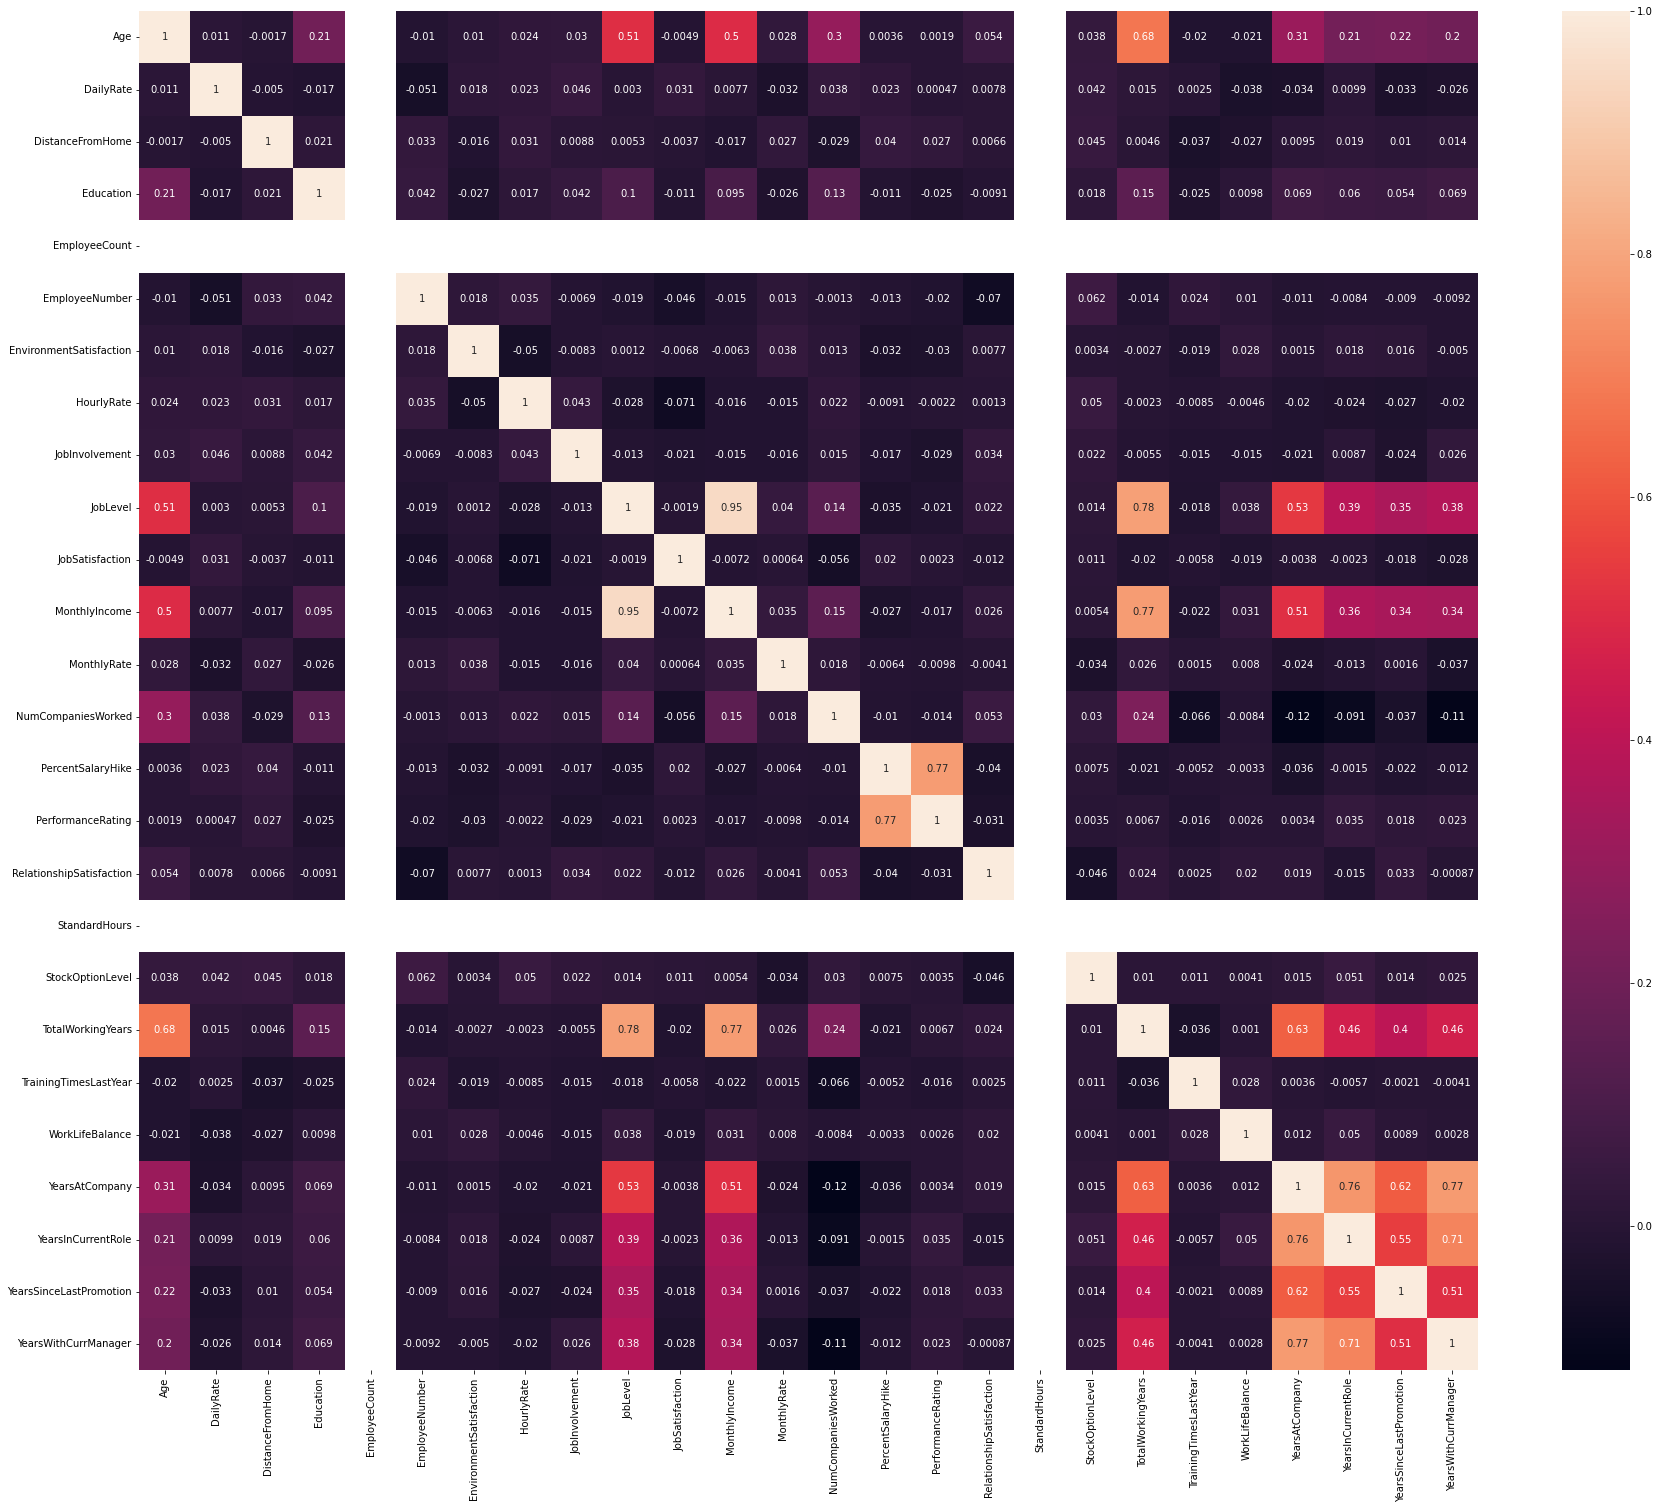

In [394]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),annot=True)
plt.plot()

Text(0.5, 1.0, 'Age')

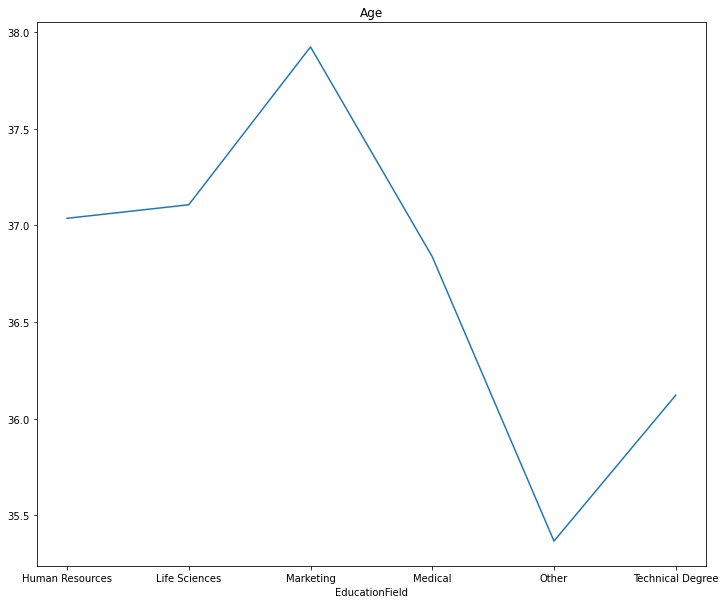

In [97]:
Attrition=df.groupby('Attrition').mean()
plt.figure(figsize=(12,10))
EducationField['Age'].plot()
plt.title('Age')

In [98]:
df.groupby(Categorical_variables[5])['Age'].mean()

JobRole
Healthcare Representative    39.809160
Human Resources              35.500000
Laboratory Technician        34.096525
Manager                      46.764706
Manufacturing Director       38.296552
Research Director            44.000000
Research Scientist           34.236301
Sales Executive              36.889571
Sales Representative         30.361446
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age')

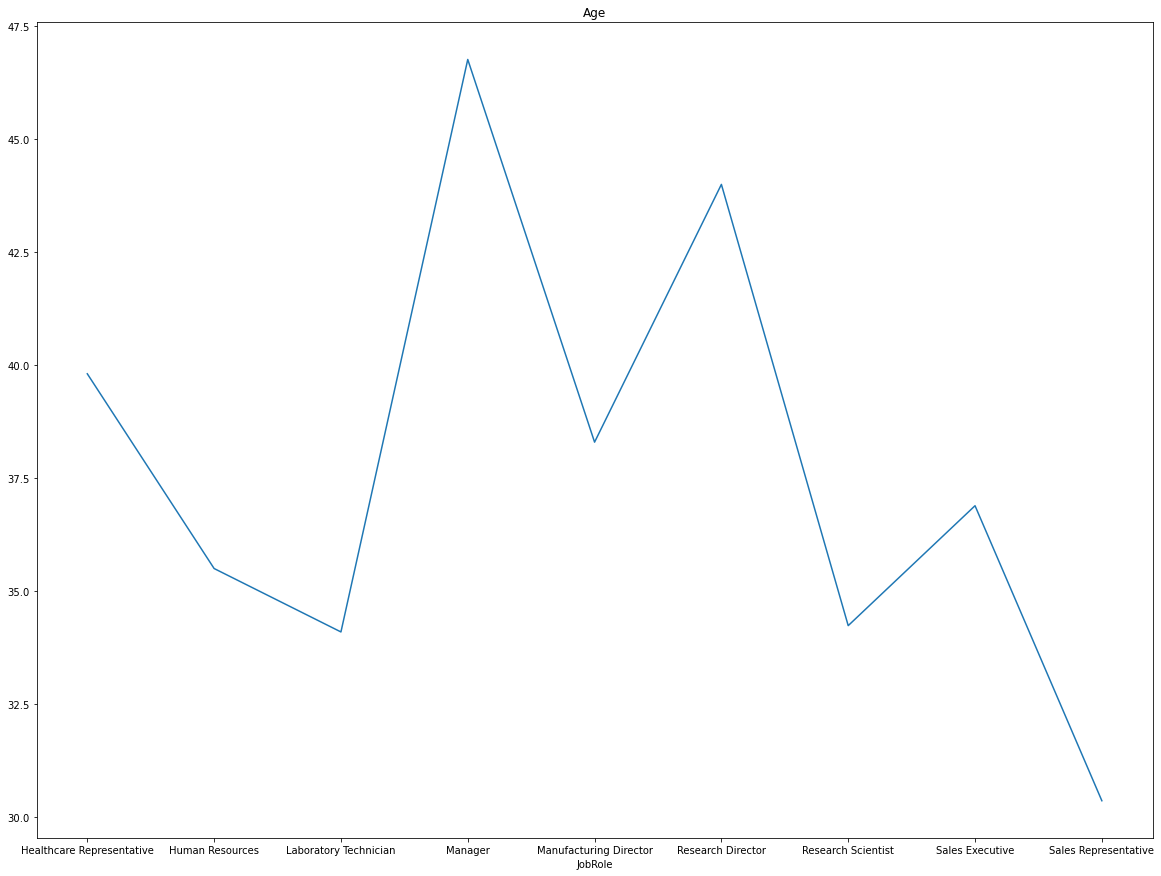

In [100]:
JobRole=df.groupby('JobRole').mean()
plt.figure(figsize=(20,15))
JobRole['Age'].plot()
plt.title('Age')

In [45]:
Categorical_variables[0]
df.groupby(Categorical_variables[0])['Age'].mean()

Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age')

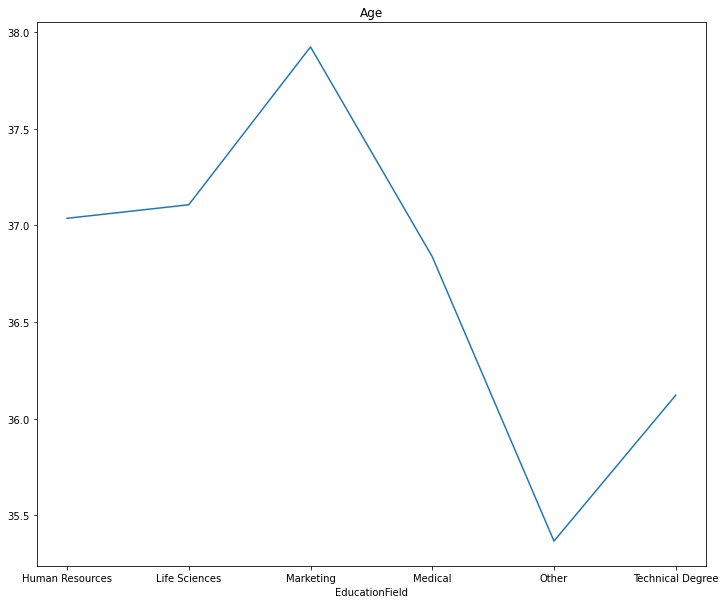

In [101]:
Attrition=df.groupby('Attrition').mean()
plt.figure(figsize=(12,10))
EducationField['Age'].plot()
plt.title('Age')

In [46]:
Categorical_variables[1]
df.groupby(Categorical_variables[1])['Age'].mean()

BusinessTravel
Non-Travel           36.620000
Travel_Frequently    36.454874
Travel_Rarely        37.092042
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age')

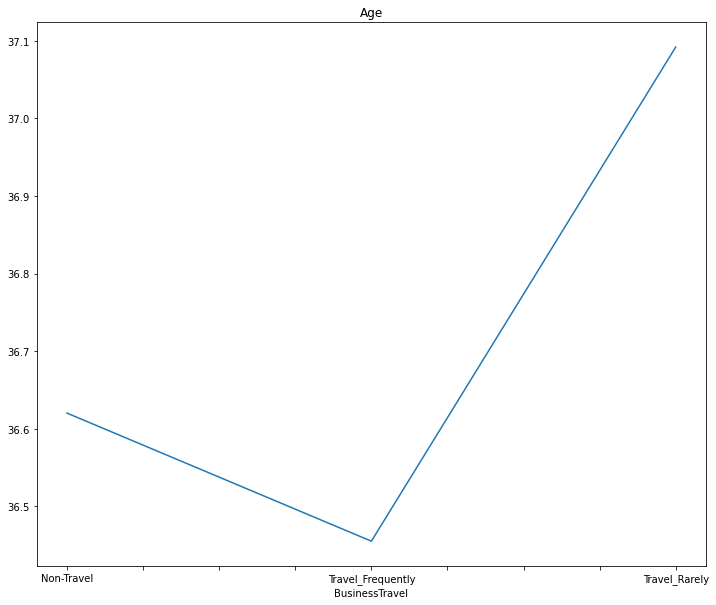

In [102]:
BusinessTravel=df.groupby('BusinessTravel').mean()
plt.figure(figsize=(12,10))
BusinessTravel['Age'].plot()
plt.title('Age')

In [47]:
Categorical_variables[2]
df.groupby(Categorical_variables[2])['Age'].mean()

Department
Human Resources           37.809524
Research & Development    37.042664
Sales                     36.542601
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age vs Department')

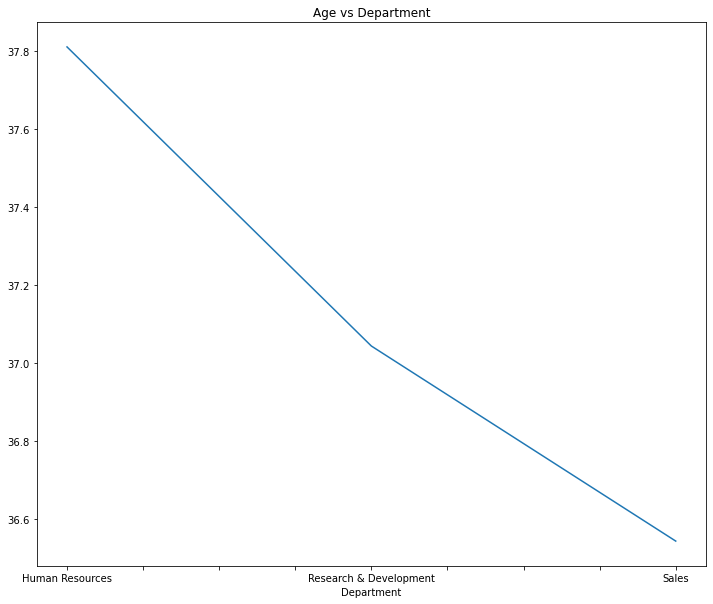

In [110]:
Department=df.groupby('Department').mean()
plt.figure(figsize=(12,10))
Department['Age'].plot()
plt.title('Age vs Department')

In [48]:
Categorical_variables[3]
df.groupby(Categorical_variables[3])['Age'].mean()

EducationField
Human Resources     37.037037
Life Sciences       37.107261
Marketing           37.924528
Medical             36.838362
Other               35.365854
Technical Degree    36.121212
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age vs EducationField')

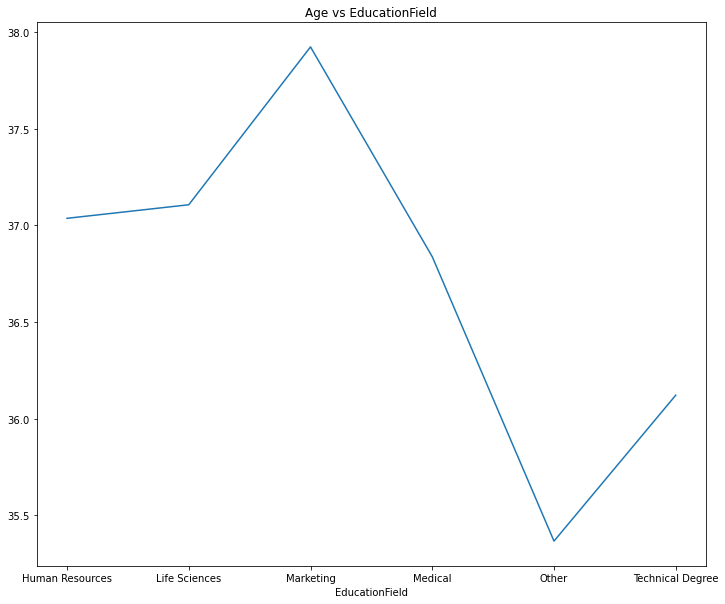

In [109]:
EducationField=df.groupby('EducationField').mean()
plt.figure(figsize=(12,10))
EducationField['Age'].plot()
plt.title('Age vs EducationField')

In [51]:
Categorical_variables[4]
df.groupby(Categorical_variables[4])['Age'].mean()

Gender
Female    37.329932
Male      36.653061
Name: Age, dtype: float64

In [52]:
Categorical_variables[5]
df.groupby(Categorical_variables[5])['Age'].mean()

JobRole
Healthcare Representative    39.809160
Human Resources              35.500000
Laboratory Technician        34.096525
Manager                      46.764706
Manufacturing Director       38.296552
Research Director            44.000000
Research Scientist           34.236301
Sales Executive              36.889571
Sales Representative         30.361446
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age vs JobRole')

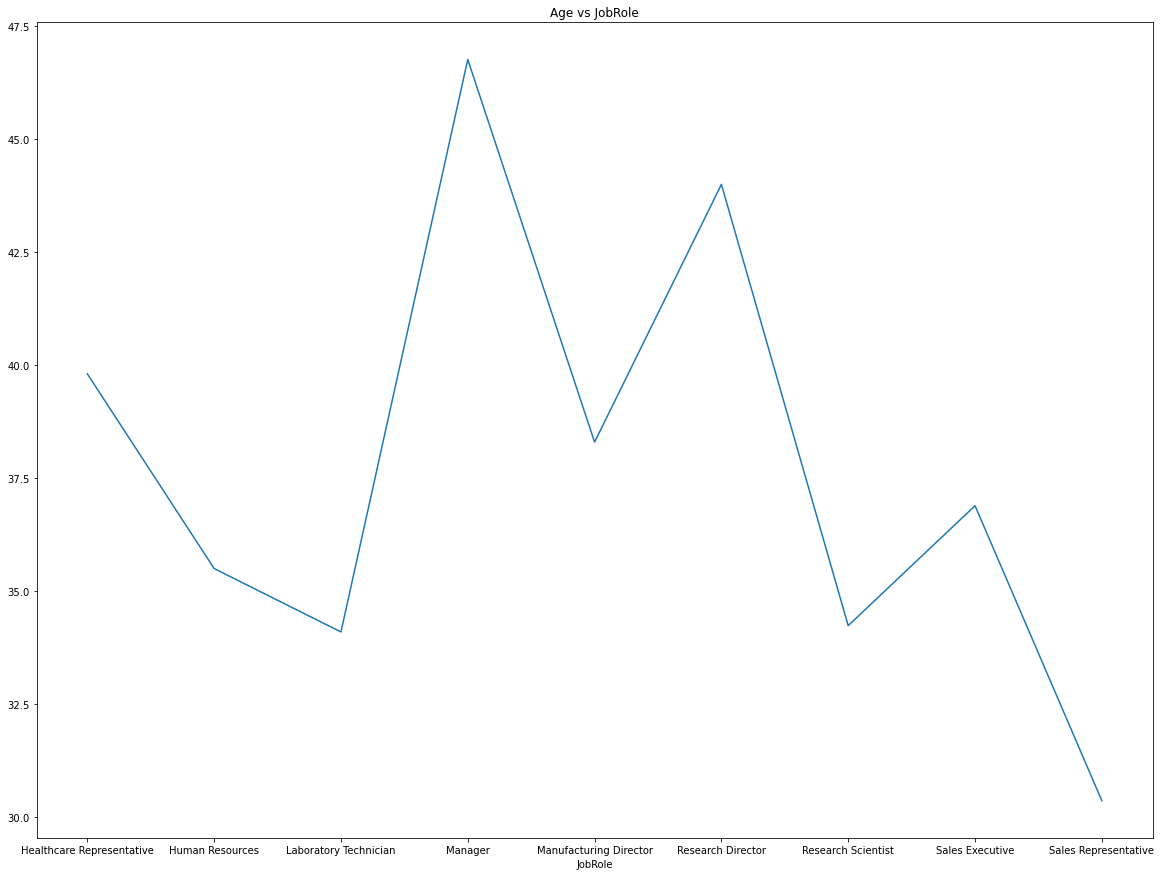

In [108]:
JobRole=df.groupby('JobRole').mean()
plt.figure(figsize=(20,15))
JobRole['Age'].plot()
plt.title('Age vs JobRole')

In [53]:
Categorical_variables[6]
df.groupby(Categorical_variables[6])['Age'].mean()

MaritalStatus
Divorced    37.489297
Married     37.757801
Single      35.336170
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age vs MaritalStatus')

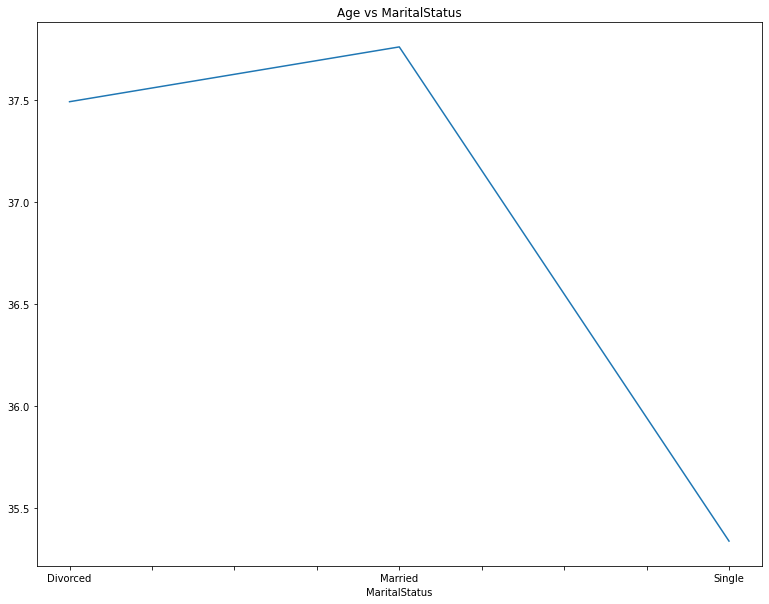

In [113]:
MaritalStatus=df.groupby('MaritalStatus').mean()
plt.figure(figsize=(13,10))
MaritalStatus['Age'].plot()
plt.title('Age vs MaritalStatus')

In [54]:
Categorical_variables[7]
df.groupby(Categorical_variables[7])['Age'].mean()

Over18
Y    36.92381
Name: Age, dtype: float64

In [55]:
Categorical_variables[8]
df.groupby(Categorical_variables[8])['Age'].mean()

OverTime
No     36.762808
Yes    37.331731
Name: Age, dtype: float64

In [65]:
Categorical_variables[3]
df.groupby(Categorical_variables[3])['Education'].mean()

EducationField
Human Resources     3.111111
Life Sciences       2.929043
Marketing           3.125786
Medical             2.803879
Other               3.073171
Technical Degree    2.825758
Name: Education, dtype: float64

Text(0.5, 1.0, 'Age vs EducationField')

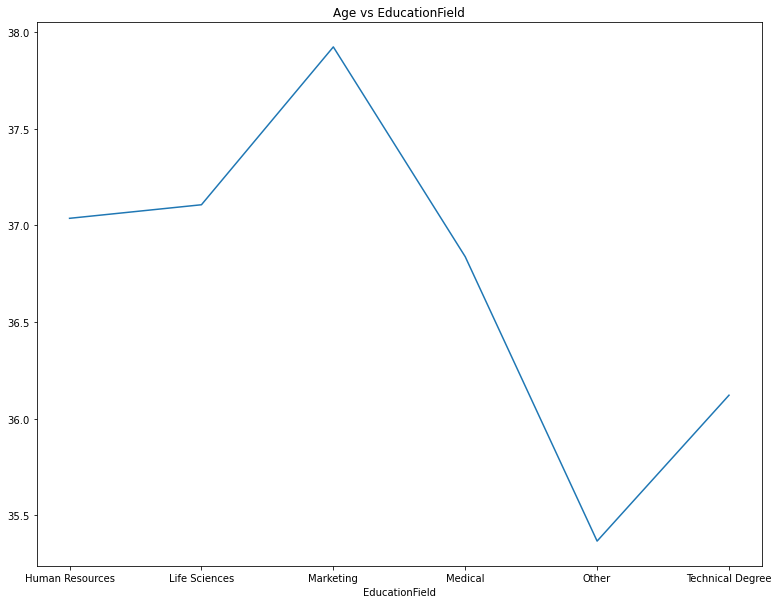

In [114]:
EducationField=df.groupby('EducationField').mean()
plt.figure(figsize=(13,10))
EducationField['Age'].plot()
plt.title('Age vs EducationField')

In [66]:
Categorical_variables[4]
df.groupby(Categorical_variables[4])['Education'].mean()

Gender
Female    2.933673
Male      2.899093
Name: Education, dtype: float64

In [64]:
Categorical_variables

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [68]:
df.groupby(Categorical_variables[5])['HourlyRate'].mean()

JobRole
Healthcare Representative    66.839695
Human Resources              64.173077
Laboratory Technician        66.683398
Manager                      66.833333
Manufacturing Director       65.006897
Research Director            63.762500
Research Scientist           66.708904
Sales Executive              65.438650
Sales Representative         64.337349
Name: HourlyRate, dtype: float64

In [78]:
df.groupby('JobRole')['JobSatisfaction'].mean()

JobRole
Healthcare Representative    2.786260
Human Resources              2.557692
Laboratory Technician        2.691120
Manager                      2.705882
Manufacturing Director       2.682759
Research Director            2.700000
Research Scientist           2.773973
Sales Executive              2.754601
Sales Representative         2.734940
Name: JobSatisfaction, dtype: float64

In [82]:
(df.groupby('JobRole')['MonthlyIncome'].mean())

JobRole
Healthcare Representative    7528.763359 
Human Resources              4235.750000 
Laboratory Technician        3237.169884 
Manager                      17181.676471
Manufacturing Director       7295.137931 
Research Director            16033.550000
Research Scientist           3239.972603 
Sales Executive              6924.279141 
Sales Representative         2626.000000 
Name: MonthlyIncome, dtype: float64

In [85]:
pd.crosstab(index=df['JobRole'], 
                             columns=[df['Education'],
                                      ],
                             margins=True)

Education                    1    2    3    4   5   All
JobRole                                                
Healthcare Representative  15   21   48   44   3   131 
Human Resources            5    12   22   10   3   52  
Laboratory Technician      35   57   104  58   5   259 
Manager                    9    19   40   29   5   102 
Manufacturing Director     15   33   54   38   5   145 
Research Director          7    13   30   23   7   80  
Research Scientist         37   46   122  79   8   292 
Sales Executive            27   66   120  101  12  326 
Sales Representative       20   15   32   16   0   83  
All                        170  282  572  398  48  1470

In [88]:
pd.crosstab(index=df['JobRole'],columns=[df['Education']],margins=True)

Education                    1    2    3    4   5   All
JobRole                                                
Healthcare Representative  15   21   48   44   3   131 
Human Resources            5    12   22   10   3   52  
Laboratory Technician      35   57   104  58   5   259 
Manager                    9    19   40   29   5   102 
Manufacturing Director     15   33   54   38   5   145 
Research Director          7    13   30   23   7   80  
Research Scientist         37   46   122  79   8   292 
Sales Executive            27   66   120  101  12  326 
Sales Representative       20   15   32   16   0   83  
All                        170  282  572  398  48  1470

In [89]:
pd.crosstab(index=df['Department'],columns=[df['BusinessTravel']],margins=True)

BusinessTravel          Non-Travel  Travel_Frequently  Travel_Rarely   All
Department                                                                
Human Resources         6           11                 46             63  
Research & Development  97          182                682            961 
Sales                   47          84                 315            446 
All                     150         277                1043           1470

In [91]:
pd.crosstab(index=df['JobRole'],columns=[df['NumCompaniesWorked']],margins=True)

NumCompaniesWorked           0    1    2    3    4   5   6   7   8   9   All
JobRole                                                                     
Healthcare Representative  18   31   19   23   11   6   5   9   5   4   131 
Human Resources            11   15   2    3    9    1   3   1   3   4   52  
Laboratory Technician      34   110  13   23   29   10  9   13  10  8   259 
Manager                    8    24   18   18   11   4   6   7   3   3   102 
Manufacturing Director     20   45   22   13   12   5   12  6   4   6   145 
Research Director          7    14   7    17   10   5   5   5   2   8   80  
Research Scientist         35   129  24   26   22   13  16  9   7   11  292 
Sales Executive            50   106  36   28   33   18  12  21  14  8   326 
Sales Representative       14   47   5    8    2    1   2   3   1   0   83  
All                        197  521  146  159  139  63  70  74  49  52  1470

In [93]:
pd.crosstab(index=df['YearsAtCompany'],columns=[df['JobRole']],margins=True)

JobRole         Healthcare Representative  Human Resources  \
YearsAtCompany                                               
0               2                          0                 
1               11                         5                 
2               5                          8                 
3               9                          7                 
4               9                          4                 
5               14                         9                 
6               10                         3                 
7               11                         3                 
8               12                         2                 
9               7                          3                 
10              11                         5                 
11              3                          2                 
12              2                          0                 
13              4                          0                 
14              2                          0                 
15              2                          0                 
16              2                          0                 
17              2                          0                 
18              2                          0                 
19              2                          0                 
20              3                          1                 
21              0                          0                 
22              2                          0                 
23              1                          0                 
24              0                          0                 
25              0                          0                 
26              0                          0                 
27              0                          0                 
29              0                          0                 
30              1                          0                 
31              0                          0                 
32              0                          0                 
33              1                          0                 
34              0                          0                 
36              0                          0                 
37              0                          0                 
40              1                          0                 
All             131                        52                

JobRole         Laboratory Technician  Manager  Manufacturing Director  \
YearsAtCompany                                                           
0               11                     2        2                        
1               50                     7        10                       
2               27                     5        6                        
3               26                     3        13                       
4               22                     0        11                       
5               37                     11       19                       
6               9                      2        9                        
7               16                     7        10                       
8               11                     1        9                        
9               13                     4        14                       
10              17                     6        16                       
11              4                      2        5                        
12              4                      1        1                        
13              1                      1        3                        
14              1                      2        3                        
15              3                      0        2                        
16              0                      2        2                        
17              2                      2        1                        
18              2                      

In [94]:
pd.crosstab(index=df['YearsSinceLastPromotion'],columns=[df['JobRole']],margins=True)

JobRole                  Healthcare Representative  Human Resources  \
YearsSinceLastPromotion                                               
0                        43                         22                
1                        35                         15                
2                        10                         6                 
3                        5                          3                 
4                        8                          2                 
5                        2                          3                 
6                        2                          0                 
7                        7                          1                 
8                        2                          0                 
9                        1                          0                 
10                       2                          0                 
11                       6                          0                 
12                       4                          0                 
13                       1                          0                 
14                       1                          0                 
15                       2                          0                 
All                      131                        52                

JobRole                  Laboratory Technician  Manager  \
YearsSinceLastPromotion                                   
0                        126                    23        
1                        64                     15        
2                        25                     9         
3                        12                     3         
4                        5                      12        
5                        6                      2         
6                        4                      5         
7                        9                      7         
8                        1                      1         
9                        4                      3         
10                       1                      1         
11                       0                      8         
12                       1                      2         
13                       0                      2         
14                       0                      4         
15                       1                      5         
All                      259                    102       

JobRole                  Manufacturing Director  Research Director  \
YearsSinceLastPromotion                                              
0                        56                      24                  
1                        38                      17                  
2                        9                       9                   
3                        7                       4                   
4                        7                       5                   
5                        9                       5                   
6                        4                       3                   
7                        9                       2                   
8                        2                       3                   
9                        0                       0                   
10                       0                       0                   
11                       1                       0                   
12                       0                       2                   
13                       0                       3                   
14                       2                       1                   
15                       1                       2                   
All                      145                     80                  

JobRole                  Research Scientist  Sales Executive  \
YearsSinceLastPromotion                                        
0                        121                 122               
1    

In [95]:
pd.crosstab(index=df['YearsWithCurrManager'],columns=[df['JobRole']],margins=True)

JobRole               Healthcare Representative  Human Resources  \
YearsWithCurrManager                                               
0                     19                         10                
1                     7                          2                 
2                     25                         16                
3                     12                         5                 
4                     8                          7                 
5                     6                          0                 
6                     3                          2                 
7                     24                         5                 
8                     10                         4                 
9                     8                          1                 
10                    2                          0                 
11                    4                          0                 
12                    1                          0                 
13                    1                          0                 
14                    0                          0                 
15                    0                          0                 
16                    0                          0                 
17                    1                          0                 
All                   131                        52                

JobRole               Laboratory Technician  Manager  Manufacturing Director  \
YearsWithCurrManager                                                           
0                     66                     13       14                       
1                     9                      7        6                        
2                     73                     13       33                       
3                     24                     2        13                       
4                     19                     7        13                       
5                     3                      0        2                        
6                     4                      3        1                        
7                     32                     15       21                       
8                     15                     9        20                       
9                     3                      9        10                       
10                    3                      7        3                        
11                    2                      2        2                        
12                    0                      5        4                        
13                    2                      3        2                        
14                    1                      3        0                        
15                    1                      1        1                        
16                    0                      2        0                        
17                    2                      1        0                        
All                   259                    102      145                      

JobRole               Research Director  Research Scientist  Sales Executive  \
YearsWithCurrManager                                                           
0                     9                  58                  40                
1                     3                  24                  16                
2                     11                 78                  59                
3                     7                  40                  37                
4                     0                  17                  26                
5                     3                  5                   11                
6                     3                  4                   7                 
7                     12                 38                  66                
8                     9                  15                  23                
9         

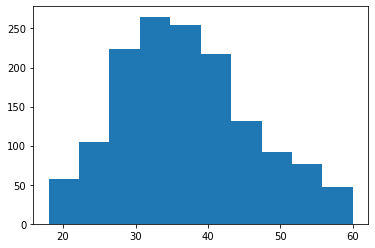

In [120]:
plt.hist(df['Age'])
plt.show()

In [159]:
df.select_dtypes(exclude=['int64']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [395]:
category = ['Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']
lab = LabelEncoder()
for i in category:
    df[i] = lab.fit_transform(df[i].astype(str))

print(df.dtypes)

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int32
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int32
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int32
MonthlyRate                 int64
NumCompaniesWorked          int32
Over18                      int32
OverTime                    int32
PercentSalaryHike           int32
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int32
TotalWorkingYears           int32
TrainingTimesL

In [396]:
df.astype(float)

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     41.0  1.0        2.0             1102.0     2.0          
1     49.0  0.0        1.0             279.0      1.0          
2     37.0  1.0        2.0             1373.0     1.0          
3     33.0  0.0        1.0             1392.0     1.0          
4     27.0  0.0        2.0             591.0      1.0          
5     32.0  0.0        1.0             1005.0     1.0          
6     59.0  0.0        2.0             1324.0     1.0          
7     30.0  0.0        2.0             1358.0     1.0          
8     38.0  0.0        1.0             216.0      1.0          
9     36.0  0.0        2.0             1299.0     1.0          
10    35.0  0.0        2.0             809.0      1.0          
11    29.0  0.0        2.0             153.0      1.0          
12    31.0  0.0        2.0             670.0      1.0          
13    34.0  0.0        2.0             1346.0     1.0          
14    28.0  1.0        2.0             103.0      1.0          
15    29.0  0.0        2.0             1389.0     1.0          
16    32.0  0.0        2.0             334.0      1.0          
17    22.0  0.0        0.0             1123.0     1.0          
18    53.0  0.0        2.0             1219.0     2.0          
19    38.0  0.0        2.0             371.0      1.0          
20    24.0  0.0        0.0             673.0      1.0          
21    36.0  1.0        2.0             1218.0     2.0          
22    34.0  0.0        2.0             419.0      1.0          
23    21.0  0.0        2.0             391.0      1.0          
24    34.0  1.0        2.0             699.0      1.0          
25    53.0  0.0        2.0             1282.0     1.0          
26    32.0  1.0        1.0             1125.0     1.0          
27    42.0  0.0        2.0             691.0      2.0          
28    44.0  0.0        2.0             477.0      1.0          
29    46.0  0.0        2.0             705.0      2.0          
30    33.0  0.0        2.0             924.0      1.0          
31    44.0  0.0        2.0             1459.0     1.0          
32    30.0  0.0        2.0             125.0      1.0          
33    39.0  1.0        2.0             895.0      2.0          
34    24.0  1.0        2.0             813.0      1.0          
35    43.0  0.0        2.0             1273.0     1.0          
36    50.0  1.0        2.0             869.0      2.0          
37    35.0  0.0        2.0             890.0      2.0          
38    36.0  0.0        2.0             852.0      1.0          
39    33.0  0.0        1.0             1141.0     2.0          
40    35.0  0.0        2.0             464.0      1.0          
41    27.0  0.0        2.0             1240.0     1.0          
42    26.0  1.0        2.0             1357.0     1.0          
43    27.0  0.0        1.0             994.0      2.0          
44    30.0  0.0        1.0             721.0      1.0          
45    41.0  1.0        2.0             1360.0     1.0          
46    34.0  0.0        0.0             1065.0     2.0          
47    37.0  0.0        2.0             408.0      1.0          
48    46.0  0.0        1.0             1211.0     2.0          
49    35.0  0.0        2.0             1229.0     1.0          
50    48.0  1.0        2.0             626.0      1.0          
51    28.0  1.0        2.0             1434.0     1.0          
52    44.0  0.0        2.0             1488.0     2.0          
53    35.0  0.0        0.0             1097.0     1.0          
54    26.0  0.0        2.0             1443.0     2.0          
55    33.0  0.0        1.0             515.0      1.0          
56    35.0  0.0        1.0             853.0      2.0          
57    35.0  0.0        2.0             1142.0     1.0          
58    31.0  0.0        2.0             655.0      1.0          
59    37.0  0.0        2.0             1115.0     1.0          
60    32.0  0.0        2.0             427.0      1.0          
61    38.0  0.0        1.0             

In [236]:
d = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

In [164]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [251]:
skew=('Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager')
for i in skew :
    if df.skew().loc[col]>0.60:
        df[i] = np.log1p(df[i])

In [252]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.070955
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.009778
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

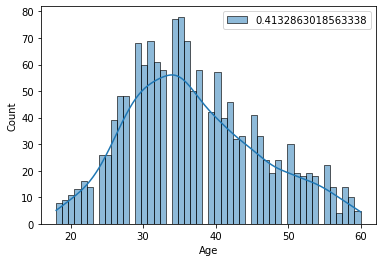

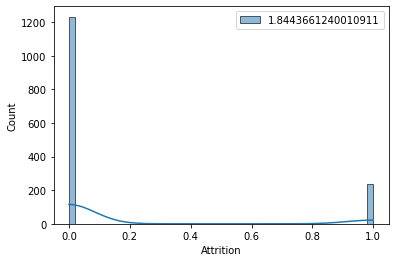

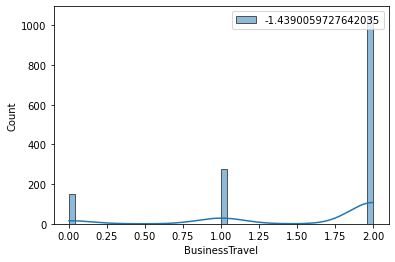

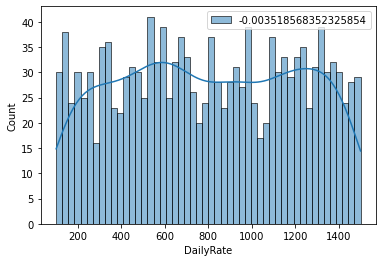

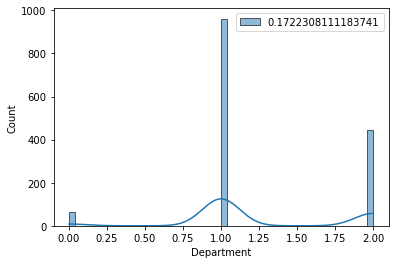

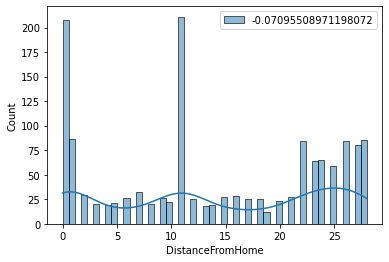

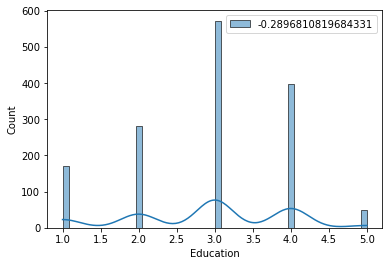

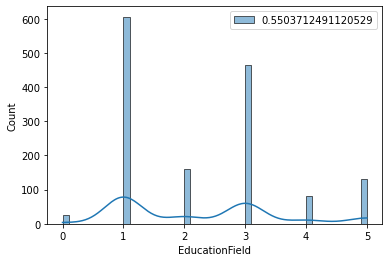

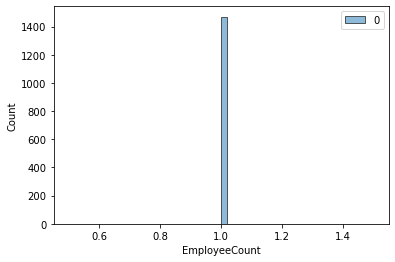

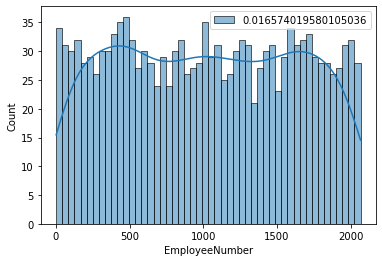

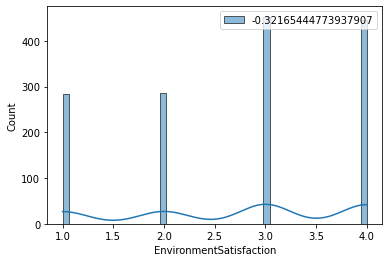

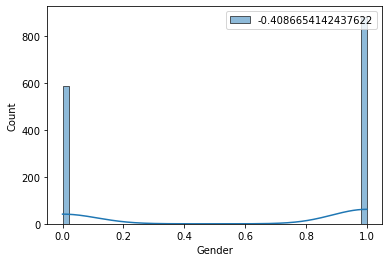

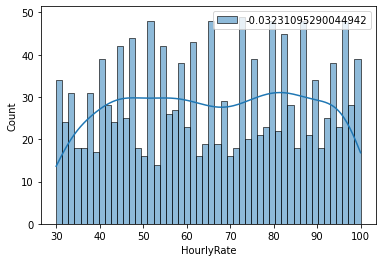

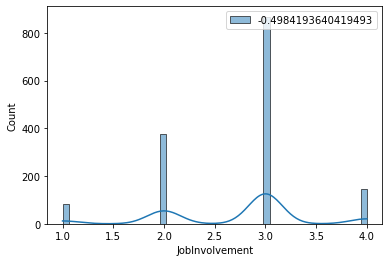

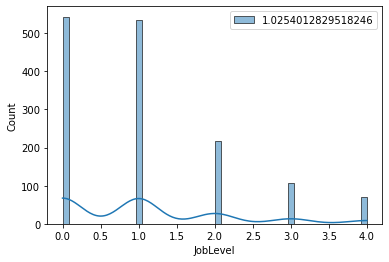

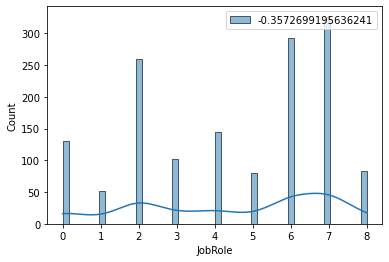

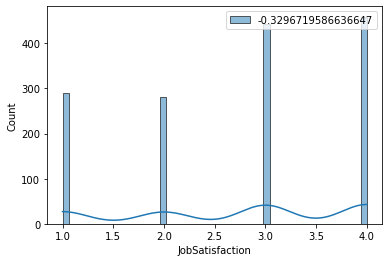

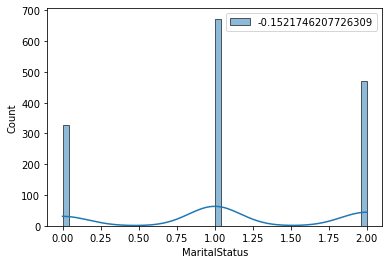

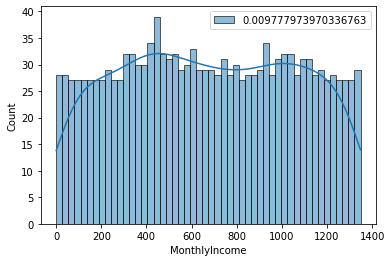

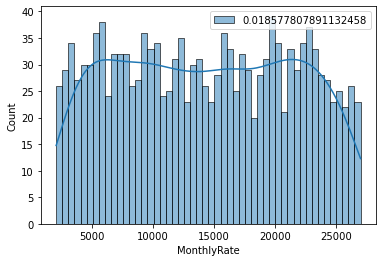

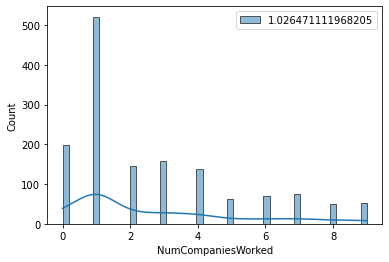

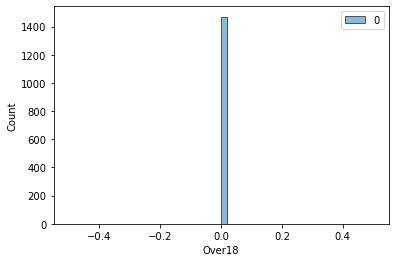

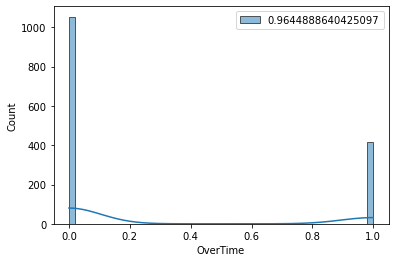

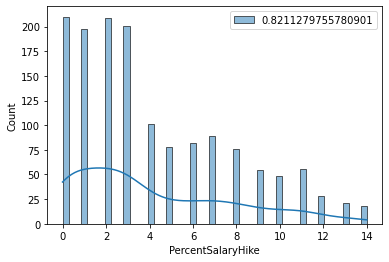

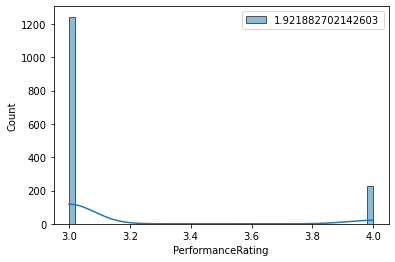

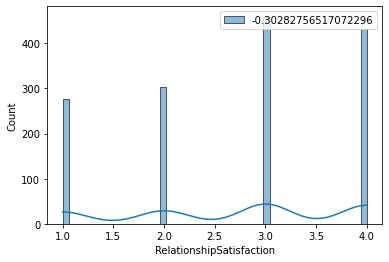

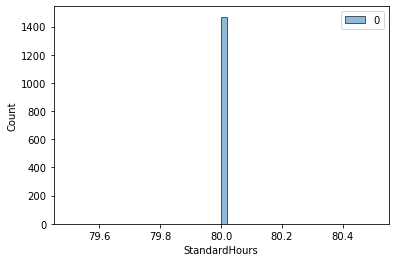

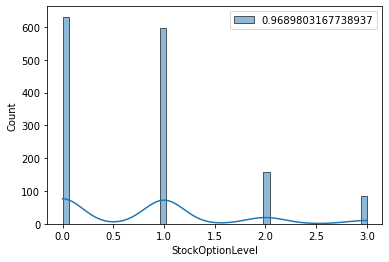

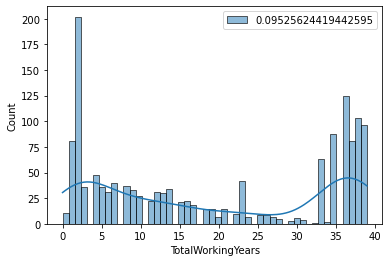

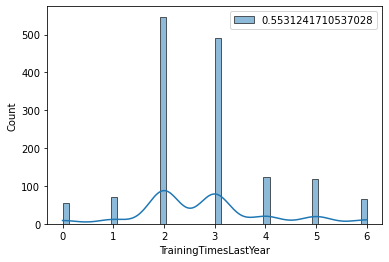

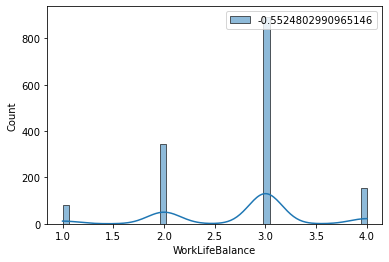

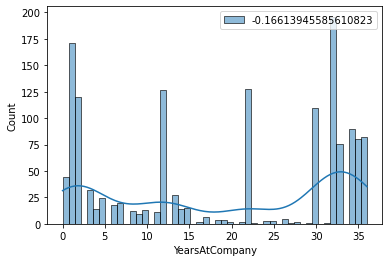

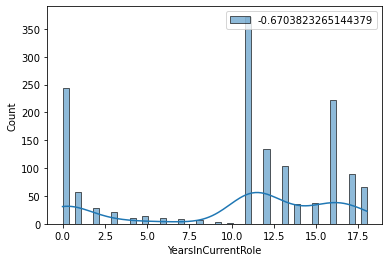

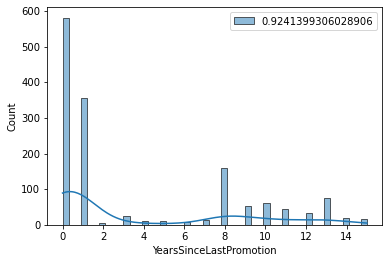

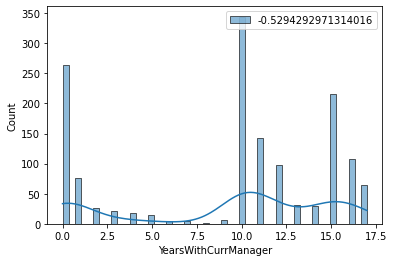

In [253]:
for i in d:
    sns.histplot(df[i], kde = True, bins = 50, label = df[i].skew())
    plt.legend(loc = 'upper right')
    plt.show()

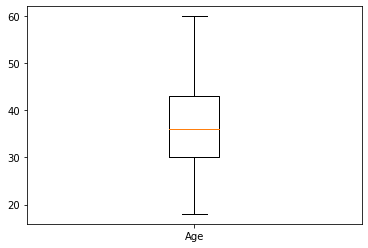

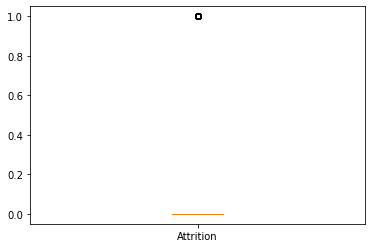

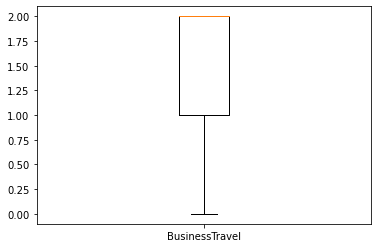

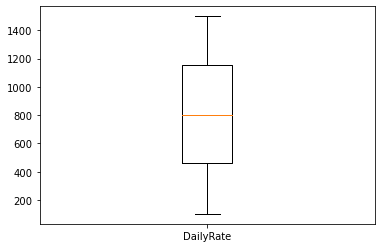

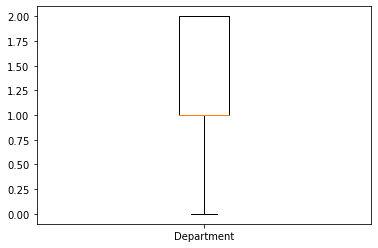

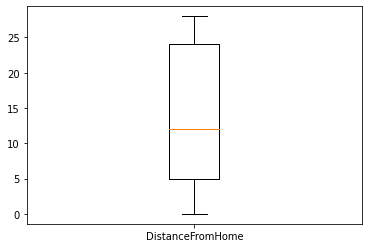

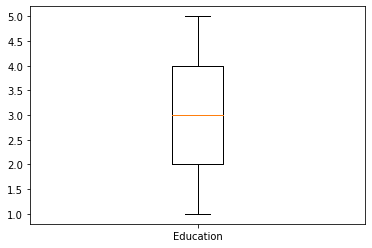

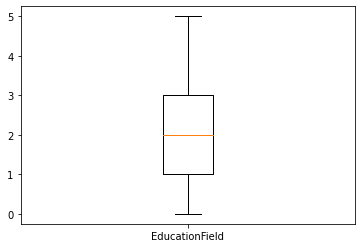

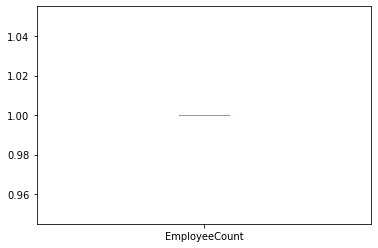

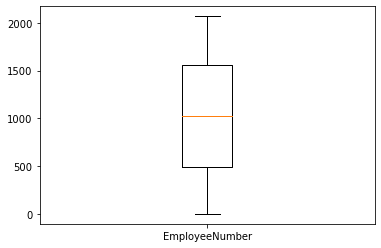

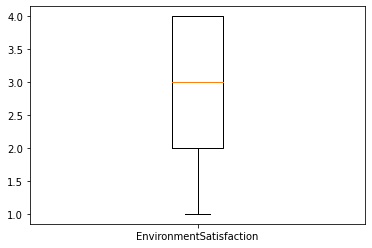

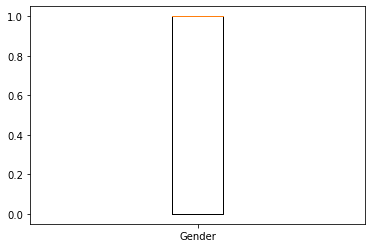

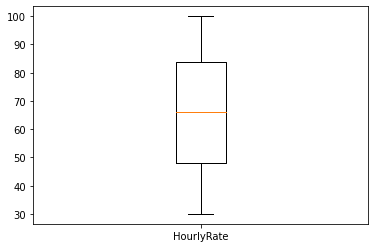

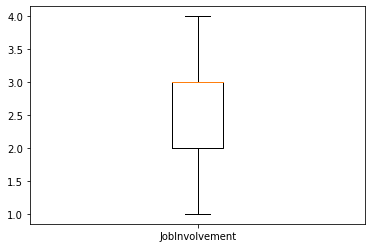

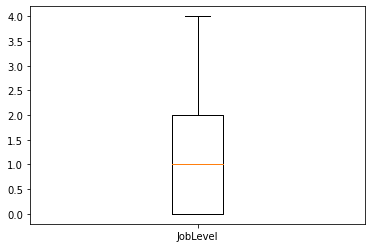

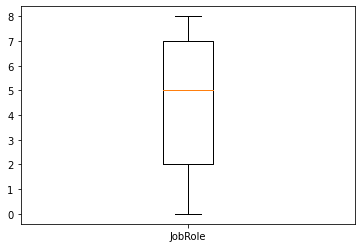

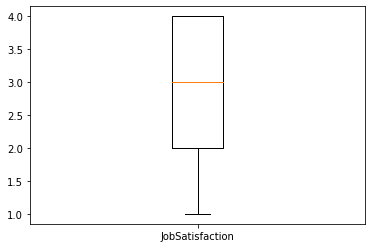

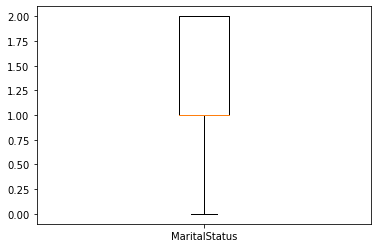

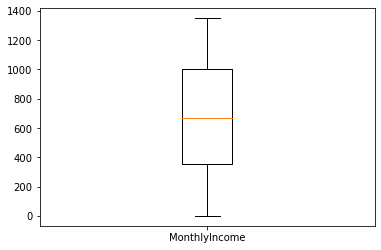

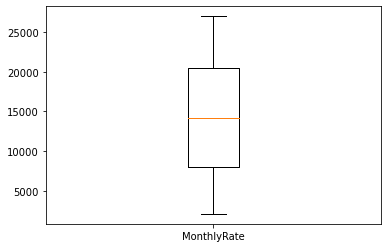

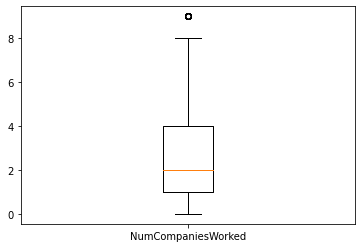

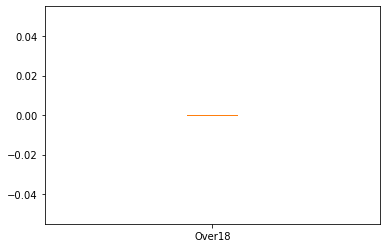

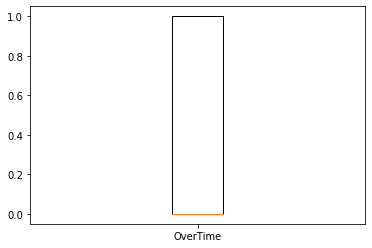

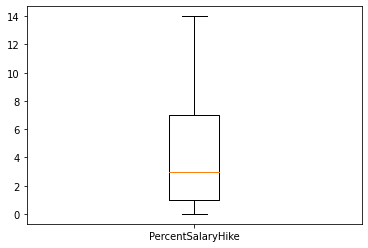

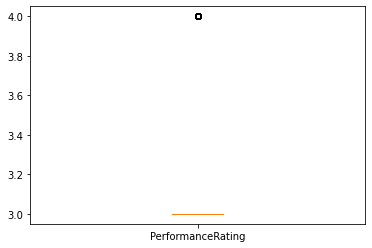

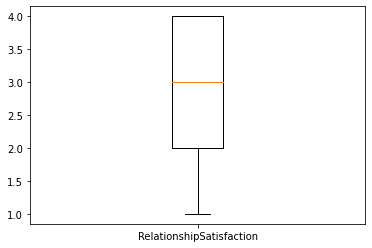

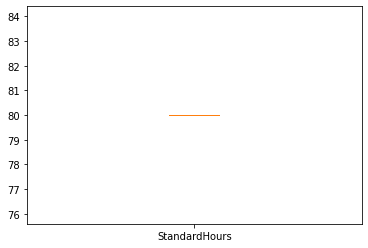

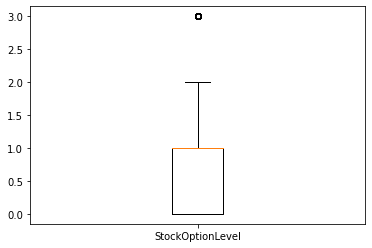

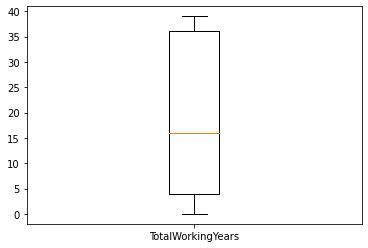

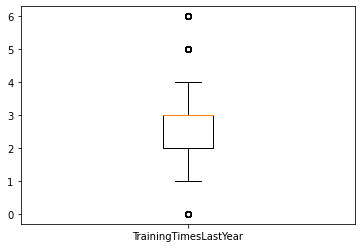

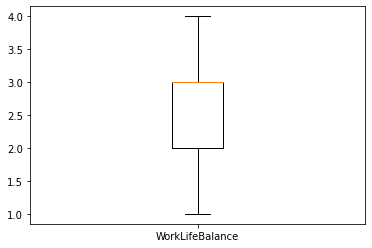

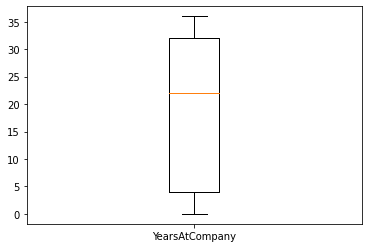

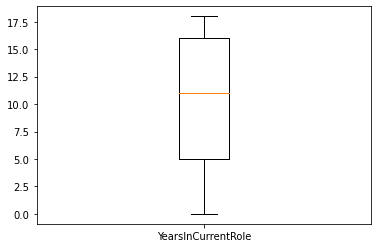

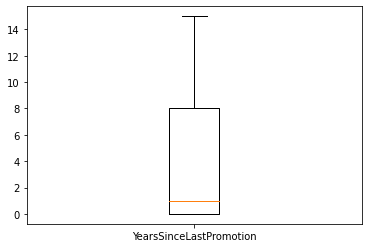

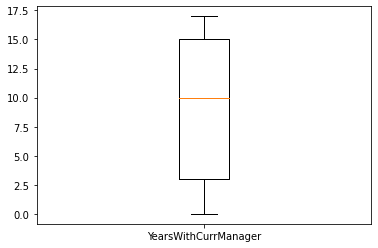

In [258]:
for i in d:
    plt.boxplot(df[i], labels = [i])
    plt.show()

In [397]:
z = np.abs(zscore(df))
print(z)

           Age  Attrition  BusinessTravel  DailyRate  Department  \
0     0.446350  2.280906   0.590048        0.742527   1.401512     
1     1.322365  0.438422   0.913194        1.297775   0.493817     
2     0.008343  2.280906   0.590048        1.414363   0.493817     
3     0.429664  0.438422   0.913194        1.461466   0.493817     
4     1.086676  0.438422   0.590048        0.524295   0.493817     
5     0.539166  0.438422   0.913194        0.502054   0.493817     
6     2.417384  0.438422   0.590048        1.292887   0.493817     
7     0.758170  0.438422   0.590048        1.377177   0.493817     
8     0.117845  0.438422   0.913194        1.453958   0.493817     
9     0.101159  0.438422   0.590048        1.230910   0.493817     
10    0.210661  0.438422   0.590048        0.016150   0.493817     
11    0.867672  0.438422   0.590048        1.610141   0.493817     
12    0.648668  0.438422   0.590048        0.328446   0.493817     
13    0.320163  0.438422   0.590048        1.347

In [398]:
threshold = 3
print(np.where(z<3))
print(df.shape)

(array([   0,    0,    0, ..., 1469, 1469, 1469], dtype=int64), array([ 0,  1,  2, ..., 32, 33, 34], dtype=int64))
(1470, 35)


In [256]:
df

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0     41   1          2               1102       2           0                  
1     49   0          1               279        1           27                 
2     37   1          2               1373       1           11                 
3     33   0          1               1392       1           22                 
4     27   0          2               591        1           11                 
5     32   0          1               1005       1           11                 
6     59   0          2               1324       1           22                 
7     30   0          2               1358       1           16                 
8     38   0          1               216        1           15                 
9     36   0          2               1299       1           19                 
10    35   0          2               809        1           7                  
11    29   0          2               153        1           6                  
12    31   0          2               670        1           18                 
13    34   0          2               1346       1           10                 
14    28   1          2               103        1           16                 
15    29   0          2               1389       1           13                 
16    32   0          2               334        1           24                 
17    22   0          0               1123       1           7                  
18    53   0          2               1219       2           11                 
19    38   0          2               371        1           11                 
20    24   0          0               673        1           2                  
21    36   1          2               1218       2           28                 
22    34   0          2               419        1           26                 
23    21   0          2               391        1           6                  
24    34   1          2               699        1           25                 
25    53   0          2               1282       1           24                 
26    32   1          1               1125       1           7                  
27    42   0          2               691        2           27                 
28    44   0          2               477        1           26                 
29    46   0          2               705        2           11                 
30    33   0          2               924        1           11                 
31    44   0          2               1459       1           1                  
32    30   0          2               125        1           28                 
33    39   1          2               895        2           24                 
34    24   1          2               813        1           0                  
35    43   0          2               1273       1           11                 
36    50   1          2               869        2           22                 
37    35   0          2               890        2           11                 
38    36   0          2               852        1           24                 
39    33   0          1               1141       2           0                  
40    35   0          2               464        1           23                 
41    27   0          2               1240       1           11                 
42    26   1          2               1357       1           17                 
43    27   0          1               994        2           27                 
44    30   0          1               721        1           0                  
45    41   1          2               1360       1           3                  
46    34   0          0               1065       2           15                 
47    37   0          2               408        1           10                 
48    46   0          1              

In [242]:
[i for i in df_new.columns if df_new[i].isnull().sum()>0]

[]

In [244]:
f = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

In [399]:
x_reg = df.drop(columns=['Attrition'])
y_reg = df[["Attrition"]]
print(x_reg.shape)
print(y_reg.shape)

(1470, 34)
(1470, 1)


In [400]:
sc = StandardScaler()
sc.fit_transform(x_reg)
x_reg = pd.DataFrame(x_reg,columns=x_reg.columns)

In [402]:
reg_model = [LinearRegression(),GradientBoostingRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),ExtraTreesRegressor(),RandomForestRegressor()]
max_r2_score = 0
for r_state in range(42,95):
    X_train, X_test, y_train, y_test = train_test_split(x_reg,y_reg,random_state = r_state,test_size = 0.33)
    for i in reg_model:
        i.fit(X_train,y_train)
        pred = i.predict(X_test)
        r2_scores = r2_score(y_test,pred)
        print("R2 score for the random state is" ,r_state ,"is", r2_scores)
        if r2_scores > max_r2_score:
            max_r2_score = r2_scores
            final_state = r_state
            final_model = i
print()
print()
print()
print()
print("Maximum R2 score in the random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)
        

R2 score for the random state is 42 is 0.14071818070822872
R2 score for the random state is 42 is 0.1599926182402539
R2 score for the random state is 42 is 0.02513798369078013
R2 score for the random state is 42 is -0.8024725274725275
R2 score for the random state is 42 is -0.2183379120879121
R2 score for the random state is 42 is 0.17150852335164835
R2 score for the random state is 42 is 0.1693789354395604
R2 score for the random state is 43 is 0.22337210375782113
R2 score for the random state is 43 is 0.2372486376786388
R2 score for the random state is 43 is 0.07651229473210985
R2 score for the random state is 43 is -0.6854315525127808
R2 score for the random state is 43 is -0.20246823522377388
R2 score for the random state is 43 is 0.2657490089389818
R2 score for the random state is 43 is 0.18980433495769689
R2 score for the random state is 44 is 0.16093075686935865
R2 score for the random state is 44 is 0.21328942135624718
R2 score for the random state is 44 is -0.03651220312356695

In [404]:
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }
GridSearch_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
GridSearch_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [405]:
GridSearch_GBR.best_params_

{'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.5}

In [406]:
GBR = GradientBoostingRegressor(n_estimators=100,learning_rate=0.02,max_depth=4,subsample = 0.5,random_state=81)
GBR.fit(X_train,y_train)
pred = GBR.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 18.941438098097752


In [407]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
print('Mean squared Error: ', mean_squared_error(y_test,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,pred)))

Mean Absolute Error:  0.22273028977242584
Mean squared Error:  0.09993502525798038
Root Mean Absolute Error:  0.4719431001428306


Text(0, 0.5, 'Predicted_Y')

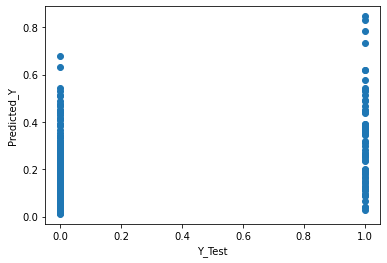

In [408]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

In [409]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [410]:
X_class = df.drop(columns=['Attrition'])
y_class = df[["Attrition"]]
print(X_class.shape)
print(y_class.shape)

(1470, 34)
(1470, 1)


In [411]:
sc = StandardScaler()
sc.fit_transform(X_class)
X_class = pd.DataFrame(X_class,columns=X_class.columns)

In [412]:
classification_model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    X_train, X_test, y_train, y_test = train_test_split(X_class,y_class,random_state = r_state,test_size = 0.33)
    for j in classification_model:
        j.fit(train_xc,train_yc)
        pred_c = j.predict(X_test)
        ac_score = accuracy_score(y_test,pred_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model_classification = j
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model_classification)

accuracy score correspond to random state  40 is 0.934156378600823
accuracy score correspond to random state  40 is 0.845679012345679
accuracy score correspond to random state  41 is 0.9382716049382716
accuracy score correspond to random state  41 is 0.845679012345679
accuracy score correspond to random state  42 is 0.934156378600823
accuracy score correspond to random state  42 is 0.8559670781893004
accuracy score correspond to random state  43 is 0.9320987654320988
accuracy score correspond to random state  43 is 0.8374485596707819
accuracy score correspond to random state  44 is 0.9259259259259259
accuracy score correspond to random state  44 is 0.8539094650205762
accuracy score correspond to random state  45 is 0.9032921810699589
accuracy score correspond to random state  45 is 0.8292181069958847
accuracy score correspond to random state  46 is 0.9053497942386831
accuracy score correspond to random state  46 is 0.8209876543209876
accuracy score correspond to random state  47 is 0.9

In [413]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [419]:
dec = DecisionTreeClassifier(random_state=56)
grid_search = GridSearchCV(estimator=dec, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [420]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=56), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [421]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=56)

In [417]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}

In [424]:
DTC = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=56)
DTC.fit(X_train,y_train)
predc = DTC.predict(X_test)
acurracy_score = accuracy_score(y_test,predc)
print("Accuracy Score :",acurracy_score*100)

Accuracy Score : 85.18518518518519


In [425]:
score = cross_val_score(DTC,X_class,y_class,cv = 100,scoring='accuracy').mean()
print('Cross_val_score : ', score*100)
print('Mean Score      : ' , score.mean()*100)
print('STD score       : ' , score.std())

Cross_val_score :  86.30476190476195
Mean Score      :  86.30476190476195
STD score       :  0.0


In [426]:
pred_prob = DTC.predict_proba(X_test)[:,1]

In [427]:
fpr,tpr,thresholds = roc_curve(y_test,pred_prob,pos_label=True)

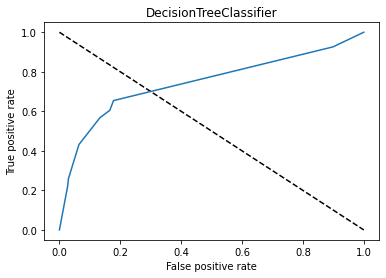

In [428]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'DecisionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.show()

In [429]:
confusion_matrix(y_test, predc)

array([[393,  12],
       [ 60,  21]], dtype=int64)

In [430]:
tn, fp, fn, tp = confusion_matrix(y_test, predc).ravel()

In [431]:
tn, fp, fn, tp

(393, 12, 60, 21)

[Text(558.0, 1189.125, 'X[21] <= 0.5\ngini = 0.267\nsamples = 984\nvalue = [828, 156]'),
 Text(279.0, 849.375, 'X[27] <= 1.5\ngini = 0.195\nsamples = 711\nvalue = [633, 78]'),
 Text(139.5, 509.625, 'X[11] <= 58.5\ngini = 0.435\nsamples = 50\nvalue = [34, 16]'),
 Text(69.75, 169.875, 'gini = 0.475\nsamples = 18\nvalue = [7, 11]'),
 Text(209.25, 169.875, 'gini = 0.264\nsamples = 32\nvalue = [27, 5]'),
 Text(418.5, 509.625, 'X[29] <= 1.5\ngini = 0.17\nsamples = 661\nvalue = [599, 62]'),
 Text(348.75, 169.875, 'gini = 0.411\nsamples = 38\nvalue = [27, 11]'),
 Text(488.25, 169.875, 'gini = 0.15\nsamples = 623\nvalue = [572, 51]'),
 Text(837.0, 849.375, 'X[13] <= 0.5\ngini = 0.408\nsamples = 273\nvalue = [195, 78]'),
 Text(697.5, 509.625, 'X[26] <= 0.5\ngini = 0.5\nsamples = 99\nvalue = [49, 50]'),
 Text(627.75, 169.875, 'gini = 0.423\nsamples = 46\nvalue = [14, 32]'),
 Text(767.25, 169.875, 'gini = 0.449\nsamples = 53\nvalue = [35, 18]'),
 Text(976.5, 509.625, 'X[26] <= 0.5\ngini = 0.27\nsa

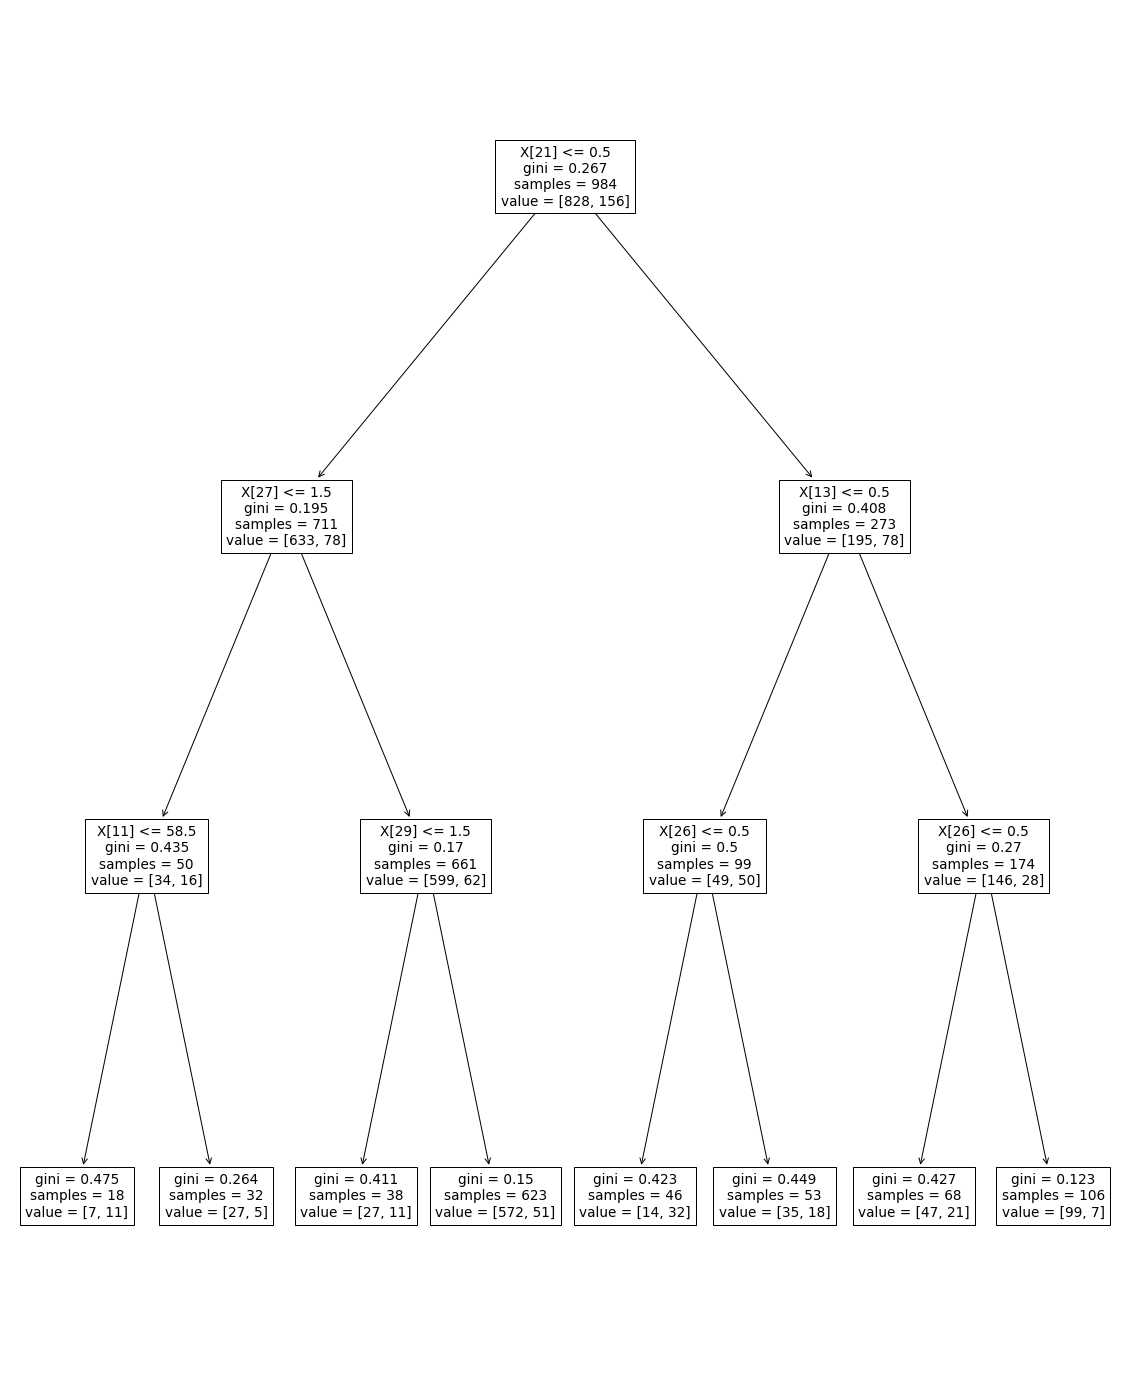

In [432]:
from sklearn import tree
g = plt.figure()
g.set_figwidth(20)
g.set_figheight(25)
tree.plot_tree(DTC)

### Conclusion
•	Import the required libraries.

•	WA_Fn-UseC_-HR-Employee-Attrition

•	This dataset contains 1470 rows and 35 columns.

•	It has 9 categorical features and 26 continuous features.

•	No null value has been present in the dataset.

•	From the barplots:We find Employees who don’t need attrition

        •	Work Life Balance
        
        •	Years In Current Role
        
        •	Years At Company
        
        •	Total Working Years
        
•	From the line chart we find:

        •	More senior people work as Research Director and Managers.
        

•	Most employees travel rarely

•	Most employees work in Human Resources department

•	In this survey, participation of the employees have almost equal categories of Single, Married & Divorced

•	Healthcare Representative have been given more hourly rate

•	Research Director get paid more.

•	Sales executives have got 5 level of education, while majority complete 3 level of education

•	Research Scientist worked in more companies, while most employees worked in 1 company

•	More employees work with same manager for 2 years

•	Categories features are converted to continuous features by using Label encoding

•	If skewness is more than 0.55 it is transformed logarithmically

•	Most features do not have outliers

The model is evaluated by using regression and classification algorithms

    •	Of the regression algorithms:
    
    •	GradientBoostingRegressor of random state 81 give more accuracy
    
    •	So cross validation is done using GridSearchCV
    
    •	From this we get the best parameters, final R2 Score is 18.941438098097752.
    
            1.	Mean Absolute Error:  0.22273028977242584
            
            2.	Mean squared Error:  0.09993502525798038
            
            3.	Root Mean Absolute Error:  0.4719431001428306
            
The classifier algorithm is evaluated using the similar procedure

            1.	DecisionTreeClassifier gives more accuracy and is cross validated.
            
            2.	Accuracy Score : 85.18518518518519
            
            3.	Cross_val_score :  86.30476190476195
            
            4.	Mean Score      :  86.30476190476195
            
            5.	STD score       :  0.0

Thus, we conclude that decision tree classifier algorithm gives the maximum accuracy of 85% and the attribution of the HR database can be predicted by this algorithm
